In [84]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [85]:
data_path='dataset'

#Getting the folder names
categories=os.listdir(data_path) 
print(categories)

#Generating a label for each class
labels = []
for i in range(len(categories)):
    labels.append(i)
print(labels)

#Attach the label to each class with name
label_dict = {}
for i in range(len(categories)):
    label_dict[categories[i]] = labels[i]
    
print(label_dict)

['with mask', 'without mask']
[0, 1]
{'with mask': 0, 'without mask': 1}


In [86]:
def drawImg(img):
    plt.style.use("seaborn")
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.show()

dataset\with mask 690


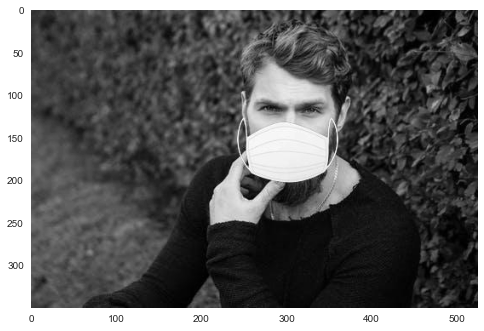

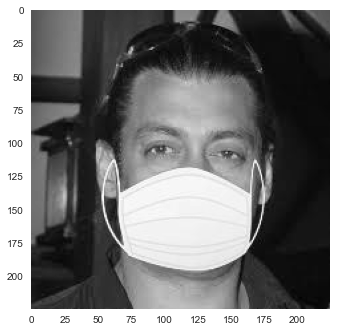

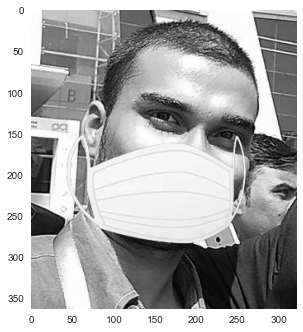

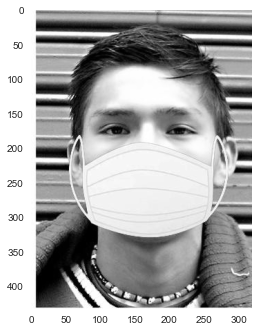

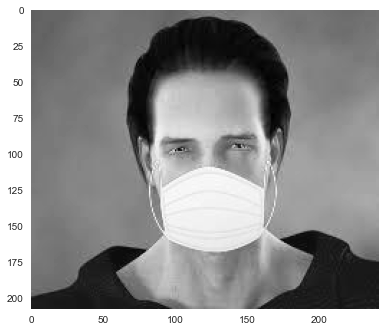

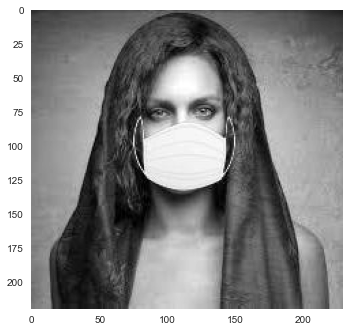

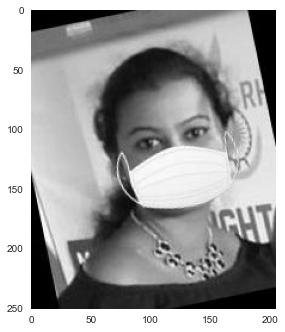

dataset\without mask 686


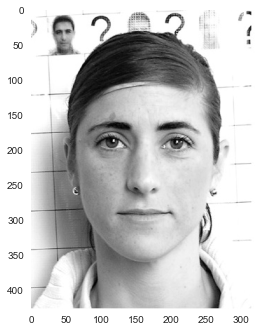

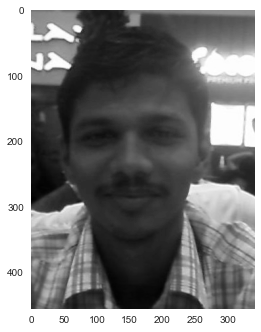

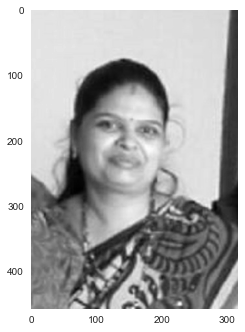

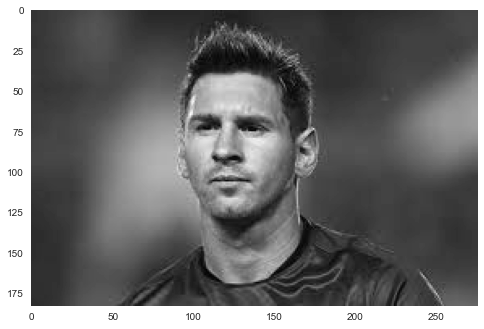

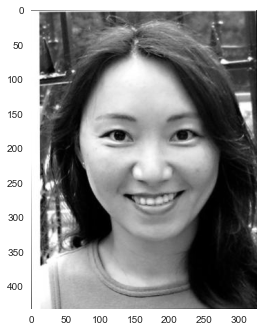

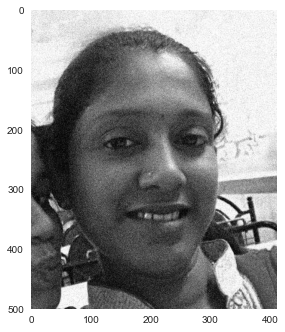

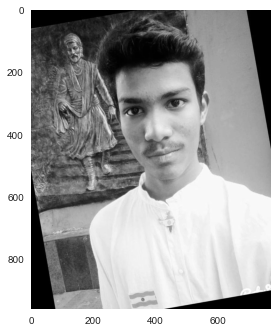

In [87]:
img_size=100
X=[]
Y=[]
count=0


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    print(folder_path,len(img_names))
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        try:
            if count%100 == 0:
                drawImg(img)    
            count+=1
            
            img_resized=cv2.resize(img,(img_size,img_size))
            
            X.append(img_resized)
            Y.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)
            count+=1
            

In [88]:
X=np.array(X)/255.0
Y = np.array(Y)

print(X.shape,Y.shape)

(1376, 100, 100) (1376,)


In [89]:
Y = np_utils.to_categorical(Y)
print(Y.shape)

(1376, 2)


In [90]:
tempX = np.reshape(X,(X.shape[0],-1))
tempY = np.reshape(Y,(Y.shape[0],-1))

print(tempX.shape,tempY.shape)

(1376, 10000) (1376, 2)


In [91]:
temp = np.hstack((tempX,tempY))

In [92]:
print(temp.shape)

(1376, 10002)


In [93]:
print(temp[:5])

[[0.2        0.20392157 0.25098039 ... 0.05882353 1.         0.        ]
 [0.98039216 0.98039216 0.98431373 ... 0.08627451 1.         0.        ]
 [0.8745098  0.88235294 0.88627451 ... 0.10196078 1.         0.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]
 [0.99215686 0.98431373 0.98431373 ... 0.14509804 1.         0.        ]]


In [94]:
np.random.shuffle(temp)

In [95]:
print(temp)

[[0.98431373 0.95686275 0.97254902 ... 0.42352941 1.         0.        ]
 [0.99215686 0.95294118 0.67058824 ... 1.         0.         1.        ]
 [0.96470588 0.95686275 0.89411765 ... 0.90588235 1.         0.        ]
 ...
 [1.         1.         1.         ... 0.20392157 0.         1.        ]
 [0.07843137 0.07058824 0.04313725 ... 0.15294118 0.         1.        ]
 [0.60784314 0.60784314 0.60784314 ... 0.57254902 1.         0.        ]]


In [96]:
X = temp[:,0:10000]
Y = temp[:,10000:100002]

In [97]:
print(X.shape,Y.shape)

(1376, 10000) (1376, 2)


In [98]:
X = np.reshape(X,(X.shape[0],img_size,img_size,1))
Y = np.reshape(Y,(Y.shape[0],2))

print(X.shape,Y.shape)

(1376, 100, 100, 1) (1376, 2)


In [99]:
np.save('data',X)
np.save('target',Y)